Importing libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd

Mounted at /content/drive


In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

In [5]:
df1 = pd.read_csv('/content/drive/MyDrive/finalproject/merged_data.csv')

Splitting the dataset into 7 seperate dataframe based on the SYNOP Code

In [6]:
grouped = df1.groupby('SYNOPCode')
dfs = {group: data for group, data in grouped}

In [7]:
cols = ['FSO_Att','RFL_Att']
x0 = dfs[0].drop(cols, axis=1)
x3 = dfs[3].drop(cols, axis=1)
x4 = dfs[4].drop(cols, axis=1)
x5 = dfs[5].drop(cols, axis=1)
x6 = dfs[6].drop(cols, axis=1)
x7 = dfs[7].drop(cols, axis=1)
x8 = dfs[8].drop(cols, axis=1)

In [8]:
y00 = dfs[0]['FSO_Att']
y03 = dfs[3]['FSO_Att']
y04 = dfs[4]['FSO_Att']
y05 = dfs[5]['FSO_Att']
y06 = dfs[6]['FSO_Att']
y07 = dfs[7]['FSO_Att']
y08 = dfs[8]['FSO_Att']
y10 = dfs[0]['RFL_Att']
y13 = dfs[3]['RFL_Att']
y14 = dfs[4]['RFL_Att']
y15 = dfs[5]['RFL_Att']
y16 = dfs[6]['RFL_Att']
y17 = dfs[7]['RFL_Att']
y18 = dfs[8]['RFL_Att']

In [9]:
temp1 = [0, 1, 2, 3, 5, 6, 7, 11, 12, 13, 14, 15, 16, 17, 18, 19, 21, 22]
temp2 = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19]
x10 = x0.iloc[:, temp1]
x13 = x3.iloc[:, temp1]
x14 = x4.iloc[:, temp1]
x15 = x5.iloc[:, temp1]
x16 = x6.iloc[:, temp1]
x17 = x7.iloc[:, temp1]
x18 = x8.iloc[:, temp1]
x20 = x0.iloc[:, temp2]
x23 = x3.iloc[:, temp2]
x24 = x4.iloc[:, temp2]
x25 = x5.iloc[:, temp2]
x26 = x6.iloc[:, temp2]
x27 = x7.iloc[:, temp2]
x28 = x8.iloc[:, temp2]

Training and testing the models seperately

In [10]:


def eval_reg(X, y, n_estimators=100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    model = ExtraTreesRegressor(n_estimators=n_estimators, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)

    return r2, rmse

In [11]:
fso0 = eval_reg(x10, y00, n_estimators=100)
fso3 = eval_reg(x13, y03, n_estimators=100)
fso4 = eval_reg(x14, y04, n_estimators=100)
fso5 = eval_reg(x15, y05, n_estimators=100)
fso6 = eval_reg(x16, y06, n_estimators=100)
fso7 = eval_reg(x17, y07, n_estimators=100)
fso8 = eval_reg(x18, y08, n_estimators=100)
rfo0 = eval_reg(x20, y10, n_estimators=100)
rfo3 = eval_reg(x23, y13, n_estimators=100)
rfo4 = eval_reg(x24, y14, n_estimators=100)
rfo5 = eval_reg(x25, y15, n_estimators=100)
rfo6 = eval_reg(x26, y16, n_estimators=100)
rfo7 = eval_reg(x27, y17, n_estimators=100)
rfo8 = eval_reg(x28, y18, n_estimators=100)

In [12]:
print(fso0)
print(fso3)
print(fso4)
print(fso5)
print(fso6)
print(fso7)
print(fso8)
print(rfo0)
print(rfo3)
print(rfo4)
print(rfo5)
print(rfo6)
print(rfo7)
print(rfo8)

(0.720909906362657, 2.1603267709201726)
(0.983337311440146, 1.1952291896447738)
(0.948166936496379, 0.8896238563175976)
(0.8220822716403361, 1.373027070602623)
(0.8179939752323224, 1.4213560600437563)
(0.9050282182357041, 1.2484279540944991)
(0.7923712455804458, 1.3087104370235612)
(0.9042424316782341, 0.6117044863871486)
(0.9932574882149602, 0.26454654879325573)
(0.9371370988557948, 0.5099160002205262)
(0.9464763701321925, 0.5891742119222501)
(0.9120707783983093, 1.007989079128927)
(0.9231645242938934, 0.25350255972258595)
(0.8979995810482008, 0.724336546913935)


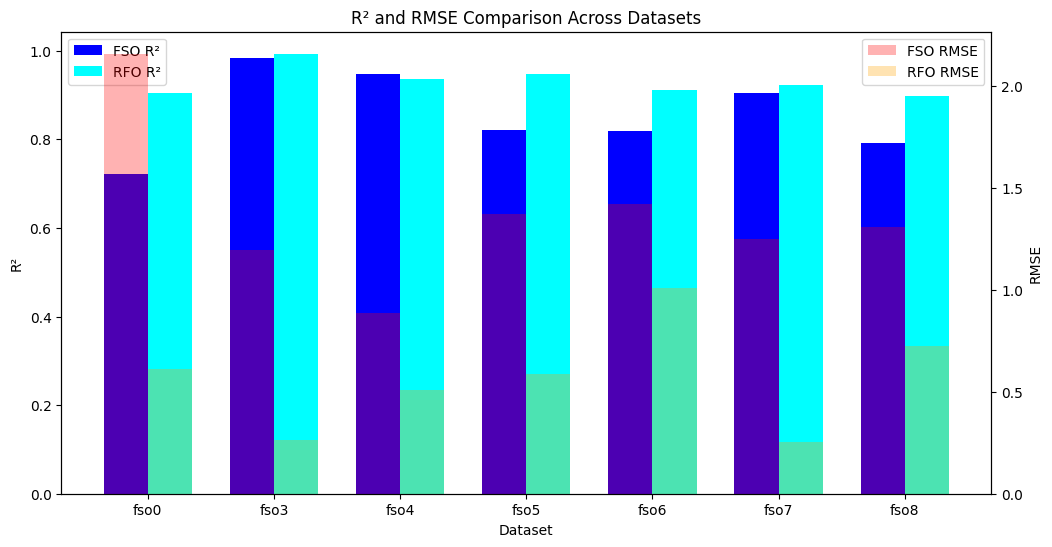

In [16]:
fso_results = [fso0, fso3, fso4, fso5, fso6, fso7, fso8]
rfo_results = [rfo0, rfo3, rfo4, rfo5, rfo6, rfo7, rfo8]
labels = ['fso0', 'fso3', 'fso4', 'fso5', 'fso6', 'fso7', 'fso8']
fso_r2 = [result[0] for result in fso_results]
fso_rmse = [result[1] for result in fso_results]
rfo_r2 = [result[0] for result in rfo_results]
rfo_rmse = [result[1] for result in rfo_results]

x = np.arange(len(labels))
width = 0.35

fig, ax1 = plt.subplots(figsize=(12, 6))

bars1 = ax1.bar(x - width/2, fso_r2, width, label='FSO R²', color='blue')
bars2 = ax1.bar(x + width/2, rfo_r2, width, label='RFO R²', color='cyan')

ax1.set_xlabel('Dataset')
ax1.set_ylabel('R²')
ax1.set_title('R² and RMSE Comparison Across Datasets')
ax1.set_xticks(x)
ax1.set_xticklabels(labels)
ax1.legend(loc='upper left')
ax2 = ax1.twinx()
bars3 = ax2.bar(x - width/2, fso_rmse, width, alpha=0.3, label='FSO RMSE', color='red')
bars4 = ax2.bar(x + width/2, rfo_rmse, width, alpha=0.3, label='RFO RMSE', color='orange')

ax2.set_ylabel('RMSE')
ax2.legend(loc='upper right')

plt.show()

Performing Hyperparameter Tuning

In [19]:


def hypertune(X, y, param_grid, cv=5, n_jobs=-1):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    model = ExtraTreesRegressor(random_state=42)
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        cv=cv,
        n_jobs=n_jobs,
        scoring='neg_mean_squared_error',
        verbose=2
    )
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    y_pred = best_model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)

    return best_model, best_params, best_score, r2, rmse

param_grid = {
    'n_estimators': [50, 100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10, 20],
    'bootstrap': [True, False]
}


In [22]:
fs10 = hypertune(x10, y00, param_grid)
fs13 = hypertune(x13, y03, param_grid)
fs14 = hypertune(x14, y04, param_grid)
fs15 = hypertune(x15, y05, param_grid)
fs16 = hypertune(x16, y06, param_grid)
fs17 = hypertune(x17, y07, param_grid)
fs18 = hypertune(x18, y08, param_grid)
rf10 = hypertune(x20, y10, param_grid)
rf13 = hypertune(x23, y13, param_grid)
rf14 = hypertune(x24, y14, param_grid)
rf15 = hypertune(x25, y15, param_grid)
rf16 = hypertune(x26, y16, param_grid)
rf17 = hypertune(x27, y17, param_grid)
rf18 = hypertune(x28, y18, param_grid)

Fitting 5 folds for each of 1440 candidates, totalling 7200 fits
Fitting 5 folds for each of 1440 candidates, totalling 7200 fits
Fitting 5 folds for each of 1440 candidates, totalling 7200 fits
Fitting 5 folds for each of 1440 candidates, totalling 7200 fits
Fitting 5 folds for each of 1440 candidates, totalling 7200 fits
Fitting 5 folds for each of 1440 candidates, totalling 7200 fits
Fitting 5 folds for each of 1440 candidates, totalling 7200 fits
Fitting 5 folds for each of 1440 candidates, totalling 7200 fits
Fitting 5 folds for each of 1440 candidates, totalling 7200 fits
Fitting 5 folds for each of 1440 candidates, totalling 7200 fits
Fitting 5 folds for each of 1440 candidates, totalling 7200 fits
Fitting 5 folds for each of 1440 candidates, totalling 7200 fits
Fitting 5 folds for each of 1440 candidates, totalling 7200 fits
Fitting 5 folds for each of 1440 candidates, totalling 7200 fits


In [23]:
print(fs10)
print(fs13)
print(fs14)
print(fs15)
print(fs16)
print(fs17)
print(fs18)
print(rf10)
print(rf13)
print(rf14)
print(rf15)
print(rf16)
print(rf17)
print(rf18)

(ExtraTreesRegressor(bootstrap=True, min_samples_split=5, n_estimators=50,
                    random_state=42), {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}, -2.49000554077895, 0.6884148819006357, 2.282630364680601)
(ExtraTreesRegressor(max_depth=10, n_estimators=400, random_state=42), {'bootstrap': False, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 400}, -1.1688224219786851, 0.9805630766005132, 1.2908994444133313)
(ExtraTreesRegressor(n_estimators=50, random_state=42), {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}, -0.9312842854614743, 0.9434487946879477, 0.9292314806670487)
(ExtraTreesRegressor(bootstrap=True, max_depth=10, min_samples_leaf=2,
                    min_samples_split=5, n_estimators=200, random_state=42), {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}, -2.7